# P03-03: Random Graph Models

*May 07 2020*

Pathpy provides build-generators for random graph models. We study the degree distribution of the generated networks and compare them to those of empirical networks.

Probability distributions over graphs.

ensamble of networks i.e. probability distribution over possible networks

Random graphs may be described by a probability distribution or by a random process wich generated them.

Random graphs being probability distributions connects to the fact that they generate an ensamble of graphs.

Random graphs give a representation of what is expected (which structures with which probability) from specified algorithm / generation process. By comparson they show what is 'unexpected' (that is different in statistically significant way) in real networks.


In [1]:
import pathpy as pp
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('default')
sns.set_style("whitegrid")

## The $G(n,m)$ model by Pál Erdös and Alred Rényi

The $G(n,m)$ models model generates the probability distribution (ensamble) of graphs with $n$ nodes and $m$ edges. 

A number of random graph models (among them $G(n,m)$ and $G(n,p)$) are implemented in the `pathpy` module `generators`. To generate random graphs using the $G(n,m)$ model we can write:

In [2]:
# pp.generators.ER_nm(30, 40, directed=False)

Notice that there is a limit to the number of edges that can be put in a graph generated in such way....

Note that we can also generate networks directed or undirected with or without loops and with multiple edges. If you want to quickly check the maximum number of possible edges for such networks with a given number of nodes, you can use the `max_edges` functions. 

In [3]:
print(pp.generators.max_edges(100, directed=True, loops=True))
print(pp.generators.max_edges(100, directed=True, loops=False))
print(pp.generators.max_edges(100, directed=False, loops=True))
print(pp.generators.max_edges(100, directed=False, loops=False))

10000
9900
5050
4950


In any case, if we specify parameters of an impossible network, the function issues the appropriate error message:

In [4]:
pp.generators.ER_nm(n=100, m=5060, directed=False, loops=True)

[09-05 18:53:54: ERROR] Given network type with n nodes can have at most 5050 edges.


## The $G(n,p)$ model by Edgar Nelson Gilbert

A downside of the $G(n,m)$ model is that links are not generated independely. We can address this with another model originally proposed by Edgar Nelson Gilbert. It assumes that we initially generate n isolated nodes, then connecting each pair of nodes with a fixed probability p (i.e. through a Bernoulli trial):

We can use the function `pp.generators.ER_np` to generate networks according to the $G(n,p)$ model:

In [5]:
# pp.generators.ER_np(n=100, p=0.02)

## Randomizing -> configuration models 

comparing network with expected property of network in ensamble (fitted from aggregated property of network)


We often use random graph models to randomize the topology of a given network, while keeping their aggregate characteristics. For this common task, `pathpy` provides `_randomize` versions of random graph functions that automatically adjust the model parameters to a given network instance. To see how this works, consider the following example network:

In [6]:
n_undirected = pp.Network(directed=False)
n_undirected.add_edge('a', 'b')
n_undirected.add_edge('b', 'c')
n_undirected.add_edge('c', 'a')
n_undirected.add_edge('d', 'e')
n_undirected.add_edge('e', 'f')
n_undirected.add_edge('f', 'g')
n_undirected.add_edge('g', 'd')
n_undirected.add_edge('d', 'f')
n_undirected.add_edge('b', 'd')
n_undirected.plot()

We can use the $G(n,m)$ model to generate a random version of this network with the same number of nodes, edges, the same edge directedness and the same node uids as follows (USING NAME OF RANDOM GRAPH MODEL + _randomize):

In [7]:
pp.generators.ER_nm_randomize(n_undirected)

We can do the swme for the $G(n,p)$ model. Here the parameter $p$ is automatically fitted to the given network, i.e. it is chosen such that the number of *expected links* in the generated microstates matches the number of links in the given network:

In [8]:
pp.generators.ER_np_randomize(n_undirected)

## Degree distribution of random $G(n,m)$ vs. empirical networks

Above we focused on.... 

And we saw that (despite having same avg deg or number of edges), different values for diameters and avg path length

Degree distribution is important property of networks

Let us now study the degree distribution of random graphs, comparing them to the degree distributions of empirical networks. For this, we first load the three empirical networks that we used in the previous units:

One thing in which $G(n,p)$ and $G(n,m)$ greatly differ from real networks is in the resulting degree distribution

(Notice that we generate and compare with the distribution of a single sampled network)

In [9]:
n_gentoo = pp.io.sql.read_network('networks.db', sql='SELECT source, target FROM gentoo', directed=False)
n_highschool = pp.io.sql.read_network('networks.db', sql='SELECT source, target FROM highschool', directed=False)
n_lotr = pp.io.sql.read_network('networks.db', sql='SELECT source, target FROM "lotr"', directed=False).largest_connected_component()
# n_physicians = pp.io.sql.read_network('networks.db', sql='SELECT source, target FROM physicians', directed=False)

[09-05 18:53:54: WARNING] The edge (21,15) exist already and will not be considered. To capture this edge, please enalbe multiedges and/or directed!
[09-05 18:53:54: WARNING] The edge (48,45) exist already and will not be considered. To capture this edge, please enalbe multiedges and/or directed!
[09-05 18:53:54: WARNING] The edge (79,45) exist already and will not be considered. To capture this edge, please enalbe multiedges and/or directed!
[09-05 18:53:54: WARNING] The edge (119,101) exist already and will not be considered. To capture this edge, please enalbe multiedges and/or directed!
[09-05 18:53:54: WARNING] The edge (120,89) exist already and will not be considered. To capture this edge, please enalbe multiedges and/or directed!
[09-05 18:53:54: WARNING] The edge (122,119) exist already and will not be considered. To capture this edge, please enalbe multiedges and/or directed!
[09-05 18:53:54: WARNING] The edge (134,87) exist already and will not be considered. To capture this

[09-05 18:53:54: WARNING] The edge (488,48) exist already and will not be considered. To capture this edge, please enalbe multiedges and/or directed!
[09-05 18:53:54: WARNING] The edge (489,145) exist already and will not be considered. To capture this edge, please enalbe multiedges and/or directed!
[09-05 18:53:54: WARNING] The edge (489,400) exist already and will not be considered. To capture this edge, please enalbe multiedges and/or directed!
[09-05 18:53:54: WARNING] The edge (489,428) exist already and will not be considered. To capture this edge, please enalbe multiedges and/or directed!
[09-05 18:53:54: WARNING] The edge (494,170) exist already and will not be considered. To capture this edge, please enalbe multiedges and/or directed!
[09-05 18:53:54: WARNING] The edge (494,265) exist already and will not be considered. To capture this edge, please enalbe multiedges and/or directed!
[09-05 18:53:54: WARNING] The edge (498,165) exist already and will not be considered. To captu

[09-05 18:53:54: WARNING] The edge (866,502) exist already and will not be considered. To capture this edge, please enalbe multiedges and/or directed!
[09-05 18:53:54: WARNING] The edge (866,753) exist already and will not be considered. To capture this edge, please enalbe multiedges and/or directed!
[09-05 18:53:54: WARNING] The edge (869,502) exist already and will not be considered. To capture this edge, please enalbe multiedges and/or directed!
[09-05 18:53:54: WARNING] The edge (869,634) exist already and will not be considered. To capture this edge, please enalbe multiedges and/or directed!
[09-05 18:53:54: WARNING] The edge (869,691) exist already and will not be considered. To capture this edge, please enalbe multiedges and/or directed!
[09-05 18:53:54: WARNING] The edge (874,454) exist already and will not be considered. To capture this edge, please enalbe multiedges and/or directed!
[09-05 18:53:54: WARNING] The edge (927,725) exist already and will not be considered. To capt

[09-05 18:53:54: WARNING] The edge (Frodo,Bilbo) exist already and will not be considered. To capture this edge, please enalbe multiedges and/or directed!
[09-05 18:53:54: WARNING] The edge (Gandalf,Bilbo) exist already and will not be considered. To capture this edge, please enalbe multiedges and/or directed!
[09-05 18:53:54: WARNING] The edge (Gandalf,Bilbo) exist already and will not be considered. To capture this edge, please enalbe multiedges and/or directed!
[09-05 18:53:54: WARNING] The edge (Frodo,Gandalf) exist already and will not be considered. To capture this edge, please enalbe multiedges and/or directed!
[09-05 18:53:54: WARNING] The edge (Frodo,Bilbo) exist already and will not be considered. To capture this edge, please enalbe multiedges and/or directed!
[09-05 18:53:54: WARNING] The edge (Gandalf,Bilbo) exist already and will not be considered. To capture this edge, please enalbe multiedges and/or directed!
[09-05 18:53:54: WARNING] The edge (Frodo,Bilbo) exist already

[09-05 18:53:55: WARNING] The edge (Gandalf,Bilbo) exist already and will not be considered. To capture this edge, please enalbe multiedges and/or directed!
[09-05 18:53:55: WARNING] The edge (Frodo,Gandalf) exist already and will not be considered. To capture this edge, please enalbe multiedges and/or directed!
[09-05 18:53:55: WARNING] The edge (Gandalf,Bilbo) exist already and will not be considered. To capture this edge, please enalbe multiedges and/or directed!
[09-05 18:53:55: WARNING] The edge (Frodo,Gandalf) exist already and will not be considered. To capture this edge, please enalbe multiedges and/or directed!
[09-05 18:53:55: WARNING] The edge (Frodo,Gandalf) exist already and will not be considered. To capture this edge, please enalbe multiedges and/or directed!
[09-05 18:53:55: WARNING] The edge (Pippin,Merry) exist already and will not be considered. To capture this edge, please enalbe multiedges and/or directed!
[09-05 18:53:55: WARNING] The edge (Pippin,Fredegar) exist 

[09-05 18:53:55: WARNING] The edge (Pippin,Frodo) exist already and will not be considered. To capture this edge, please enalbe multiedges and/or directed!
[09-05 18:53:55: WARNING] The edge (Pippin,Sam) exist already and will not be considered. To capture this edge, please enalbe multiedges and/or directed!
[09-05 18:53:55: WARNING] The edge (Frodo,Sam) exist already and will not be considered. To capture this edge, please enalbe multiedges and/or directed!
[09-05 18:53:55: WARNING] The edge (Pippin,Sam) exist already and will not be considered. To capture this edge, please enalbe multiedges and/or directed!
[09-05 18:53:55: WARNING] The edge (Sam,Frodo) exist already and will not be considered. To capture this edge, please enalbe multiedges and/or directed!
[09-05 18:53:55: WARNING] The edge (Frodo,Merry) exist already and will not be considered. To capture this edge, please enalbe multiedges and/or directed!
[09-05 18:53:55: WARNING] The edge (Pippin,Frodo) exist already and will no

[09-05 18:53:55: WARNING] The edge (Tom,Gandalf) exist already and will not be considered. To capture this edge, please enalbe multiedges and/or directed!
[09-05 18:53:55: WARNING] The edge (Frodo,Merry) exist already and will not be considered. To capture this edge, please enalbe multiedges and/or directed!
[09-05 18:53:55: WARNING] The edge (Tom,Frodo) exist already and will not be considered. To capture this edge, please enalbe multiedges and/or directed!
[09-05 18:53:55: WARNING] The edge (Pippin,Sam) exist already and will not be considered. To capture this edge, please enalbe multiedges and/or directed!
[09-05 18:53:55: WARNING] The edge (Pippin,Merry) exist already and will not be considered. To capture this edge, please enalbe multiedges and/or directed!
[09-05 18:53:55: WARNING] The edge (Sam,Merry) exist already and will not be considered. To capture this edge, please enalbe multiedges and/or directed!
[09-05 18:53:55: WARNING] The edge (Frodo,Gandalf) exist already and will 

[09-05 18:53:55: WARNING] The edge (Nob,Merry) exist already and will not be considered. To capture this edge, please enalbe multiedges and/or directed!
[09-05 18:53:55: WARNING] The edge (Merry,Gandalf) exist already and will not be considered. To capture this edge, please enalbe multiedges and/or directed!
[09-05 18:53:55: WARNING] The edge (Bob,Bill) exist already and will not be considered. To capture this edge, please enalbe multiedges and/or directed!
[09-05 18:53:55: WARNING] The edge (Nob,Butterbur) exist already and will not be considered. To capture this edge, please enalbe multiedges and/or directed!
[09-05 18:53:55: WARNING] The edge (Pippin,Frodo) exist already and will not be considered. To capture this edge, please enalbe multiedges and/or directed!
[09-05 18:53:55: WARNING] The edge (Pippin,Merry) exist already and will not be considered. To capture this edge, please enalbe multiedges and/or directed!
[09-05 18:53:55: WARNING] The edge (Pippin,Sam) exist already and wil

[09-05 18:53:55: WARNING] The edge (Frodo,Gandalf) exist already and will not be considered. To capture this edge, please enalbe multiedges and/or directed!
[09-05 18:53:55: WARNING] The edge (Frodo,Gandalf) exist already and will not be considered. To capture this edge, please enalbe multiedges and/or directed!
[09-05 18:53:55: WARNING] The edge (Frodo,Gandalf) exist already and will not be considered. To capture this edge, please enalbe multiedges and/or directed!
[09-05 18:53:55: WARNING] The edge (Glorfindel,Elrond) exist already and will not be considered. To capture this edge, please enalbe multiedges and/or directed!
[09-05 18:53:55: WARNING] The edge (Sam,Frodo) exist already and will not be considered. To capture this edge, please enalbe multiedges and/or directed!
[09-05 18:53:55: WARNING] The edge (Glorfindel,Elrond) exist already and will not be considered. To capture this edge, please enalbe multiedges and/or directed!
[09-05 18:53:55: WARNING] The edge (Gandalf,Elrond) ex

[09-05 18:53:55: WARNING] The edge (Elendil,Gil-galad) exist already and will not be considered. To capture this edge, please enalbe multiedges and/or directed!
[09-05 18:53:55: WARNING] The edge (Elendil,Sauron) exist already and will not be considered. To capture this edge, please enalbe multiedges and/or directed!
[09-05 18:53:55: WARNING] The edge (Gil-galad,Sauron) exist already and will not be considered. To capture this edge, please enalbe multiedges and/or directed!
[09-05 18:53:55: WARNING] The edge (Elwing,Eärendil) exist already and will not be considered. To capture this edge, please enalbe multiedges and/or directed!
[09-05 18:53:55: WARNING] The edge (Elwing,Lúthien) exist already and will not be considered. To capture this edge, please enalbe multiedges and/or directed!
[09-05 18:53:55: WARNING] The edge (Elwing,Dior) exist already and will not be considered. To capture this edge, please enalbe multiedges and/or directed!
[09-05 18:53:55: WARNING] The edge (Eärendil,Lúth

[09-05 18:53:55: WARNING] The edge (Elrond,Aragorn) exist already and will not be considered. To capture this edge, please enalbe multiedges and/or directed!
[09-05 18:53:55: WARNING] The edge (Frodo,Gandalf) exist already and will not be considered. To capture this edge, please enalbe multiedges and/or directed!
[09-05 18:53:55: WARNING] The edge (Frodo,Gandalf) exist already and will not be considered. To capture this edge, please enalbe multiedges and/or directed!
[09-05 18:53:55: WARNING] The edge (Frodo,Bilbo) exist already and will not be considered. To capture this edge, please enalbe multiedges and/or directed!
[09-05 18:53:55: WARNING] The edge (Gandalf,Bilbo) exist already and will not be considered. To capture this edge, please enalbe multiedges and/or directed!
[09-05 18:53:55: WARNING] The edge (Gimli,Glóin) exist already and will not be considered. To capture this edge, please enalbe multiedges and/or directed!
[09-05 18:53:55: WARNING] The edge (Legolas,Glóin) exist alre

[09-05 18:53:55: WARNING] The edge (Frodo,Bilbo) exist already and will not be considered. To capture this edge, please enalbe multiedges and/or directed!
[09-05 18:53:55: WARNING] The edge (Gandalf,Boromir) exist already and will not be considered. To capture this edge, please enalbe multiedges and/or directed!
[09-05 18:53:55: WARNING] The edge (Aragorn,Boromir) exist already and will not be considered. To capture this edge, please enalbe multiedges and/or directed!
[09-05 18:53:55: WARNING] The edge (Aragorn,Boromir) exist already and will not be considered. To capture this edge, please enalbe multiedges and/or directed!
[09-05 18:53:55: WARNING] The edge (Aragorn,Boromir) exist already and will not be considered. To capture this edge, please enalbe multiedges and/or directed!
[09-05 18:53:55: WARNING] The edge (Pippin,Merry) exist already and will not be considered. To capture this edge, please enalbe multiedges and/or directed!
[09-05 18:53:55: WARNING] The edge (Frodo,Aragorn) ex

[09-05 18:53:55: WARNING] The edge (Gimli,Frodo) exist already and will not be considered. To capture this edge, please enalbe multiedges and/or directed!
[09-05 18:53:55: WARNING] The edge (Balin,Fundin) exist already and will not be considered. To capture this edge, please enalbe multiedges and/or directed!
[09-05 18:53:55: WARNING] The edge (Aragorn,Boromir) exist already and will not be considered. To capture this edge, please enalbe multiedges and/or directed!
[09-05 18:53:55: WARNING] The edge (Pippin,Merry) exist already and will not be considered. To capture this edge, please enalbe multiedges and/or directed!
[09-05 18:53:55: WARNING] The edge (Frodo,Aragorn) exist already and will not be considered. To capture this edge, please enalbe multiedges and/or directed!
[09-05 18:53:55: WARNING] The edge (Aragorn,Boromir) exist already and will not be considered. To capture this edge, please enalbe multiedges and/or directed!
[09-05 18:53:55: WARNING] The edge (Pippin,Frodo) exist al

[09-05 18:53:55: WARNING] The edge (Frodo,Aragorn) exist already and will not be considered. To capture this edge, please enalbe multiedges and/or directed!
[09-05 18:53:55: WARNING] The edge (Galadriel,Celeborn) exist already and will not be considered. To capture this edge, please enalbe multiedges and/or directed!
[09-05 18:53:55: WARNING] The edge (Galadriel,Celeborn) exist already and will not be considered. To capture this edge, please enalbe multiedges and/or directed!
[09-05 18:53:55: WARNING] The edge (Legolas,Frodo) exist already and will not be considered. To capture this edge, please enalbe multiedges and/or directed!
[09-05 18:53:55: WARNING] The edge (Galadriel,Celeborn) exist already and will not be considered. To capture this edge, please enalbe multiedges and/or directed!
[09-05 18:53:55: WARNING] The edge (Haldir,Frodo) exist already and will not be considered. To capture this edge, please enalbe multiedges and/or directed!
[09-05 18:53:55: WARNING] The edge (Gimli,Gl

[09-05 18:53:55: WARNING] The edge (Boromir,Sam) exist already and will not be considered. To capture this edge, please enalbe multiedges and/or directed!
[09-05 18:53:55: WARNING] The edge (Boromir,Aragorn) exist already and will not be considered. To capture this edge, please enalbe multiedges and/or directed!
[09-05 18:53:55: WARNING] The edge (Boromir,Legolas) exist already and will not be considered. To capture this edge, please enalbe multiedges and/or directed!
[09-05 18:53:55: WARNING] The edge (Gimli,Sam) exist already and will not be considered. To capture this edge, please enalbe multiedges and/or directed!
[09-05 18:53:55: WARNING] The edge (Gimli,Aragorn) exist already and will not be considered. To capture this edge, please enalbe multiedges and/or directed!
[09-05 18:53:55: WARNING] The edge (Gimli,Legolas) exist already and will not be considered. To capture this edge, please enalbe multiedges and/or directed!
[09-05 18:53:55: WARNING] The edge (Sam,Aragorn) exist alrea

[09-05 18:53:55: WARNING] The edge (Isildur,Elendil) exist already and will not be considered. To capture this edge, please enalbe multiedges and/or directed!
[09-05 18:53:55: WARNING] The edge (Valandil,Elendil) exist already and will not be considered. To capture this edge, please enalbe multiedges and/or directed!
[09-05 18:53:55: WARNING] The edge (Elendil,Elessar) exist already and will not be considered. To capture this edge, please enalbe multiedges and/or directed!
[09-05 18:53:55: WARNING] The edge (Frodo,Aragorn) exist already and will not be considered. To capture this edge, please enalbe multiedges and/or directed!
[09-05 18:53:55: WARNING] The edge (Sam,Frodo) exist already and will not be considered. To capture this edge, please enalbe multiedges and/or directed!
[09-05 18:53:55: WARNING] The edge (Sam,Boromir) exist already and will not be considered. To capture this edge, please enalbe multiedges and/or directed!
[09-05 18:53:55: WARNING] The edge (Frodo,Boromir) exist 

[09-05 18:53:55: WARNING] The edge (Sauron,Aragorn) exist already and will not be considered. To capture this edge, please enalbe multiedges and/or directed!
[09-05 18:53:55: WARNING] The edge (Isildur,Elendil) exist already and will not be considered. To capture this edge, please enalbe multiedges and/or directed!
[09-05 18:53:55: WARNING] The edge (Isildur,Elessar) exist already and will not be considered. To capture this edge, please enalbe multiedges and/or directed!
[09-05 18:53:55: WARNING] The edge (Isildur,Aragorn) exist already and will not be considered. To capture this edge, please enalbe multiedges and/or directed!
[09-05 18:53:55: WARNING] The edge (Elendil,Elessar) exist already and will not be considered. To capture this edge, please enalbe multiedges and/or directed!
[09-05 18:53:55: WARNING] The edge (Elendil,Aragorn) exist already and will not be considered. To capture this edge, please enalbe multiedges and/or directed!
[09-05 18:53:55: WARNING] The edge (Gimli,Legol

[09-05 18:53:55: WARNING] The edge (Pippin,Merry) exist already and will not be considered. To capture this edge, please enalbe multiedges and/or directed!
[09-05 18:53:55: WARNING] The edge (Pippin,Merry) exist already and will not be considered. To capture this edge, please enalbe multiedges and/or directed!
[09-05 18:53:55: WARNING] The edge (Sam,Frodo) exist already and will not be considered. To capture this edge, please enalbe multiedges and/or directed!
[09-05 18:53:55: WARNING] The edge (Legolas,Aragorn) exist already and will not be considered. To capture this edge, please enalbe multiedges and/or directed!
[09-05 18:53:55: WARNING] The edge (Pippin,Merry) exist already and will not be considered. To capture this edge, please enalbe multiedges and/or directed!
[09-05 18:53:55: WARNING] The edge (Pippin,Merry) exist already and will not be considered. To capture this edge, please enalbe multiedges and/or directed!
[09-05 18:53:55: WARNING] The edge (Pippin,Boromir) exist alread

[09-05 18:53:55: WARNING] The edge (Legolas,Aragorn) exist already and will not be considered. To capture this edge, please enalbe multiedges and/or directed!
[09-05 18:53:55: WARNING] The edge (Gandalf,Aragorn) exist already and will not be considered. To capture this edge, please enalbe multiedges and/or directed!
[09-05 18:53:55: WARNING] The edge (Elendil,Aragorn) exist already and will not be considered. To capture this edge, please enalbe multiedges and/or directed!
[09-05 18:53:55: WARNING] The edge (Legolas,Aragorn) exist already and will not be considered. To capture this edge, please enalbe multiedges and/or directed!
[09-05 18:53:55: WARNING] The edge (Gandalf,Saruman) exist already and will not be considered. To capture this edge, please enalbe multiedges and/or directed!
[09-05 18:53:55: WARNING] The edge (Gimli,Legolas) exist already and will not be considered. To capture this edge, please enalbe multiedges and/or directed!
[09-05 18:53:55: WARNING] The edge (Gimli,Gandal

[09-05 18:53:55: WARNING] The edge (Gimli,Aragorn) exist already and will not be considered. To capture this edge, please enalbe multiedges and/or directed!
[09-05 18:53:55: WARNING] The edge (Legolas,Aragorn) exist already and will not be considered. To capture this edge, please enalbe multiedges and/or directed!
[09-05 18:53:55: WARNING] The edge (Treebeard,Gandalf) exist already and will not be considered. To capture this edge, please enalbe multiedges and/or directed!
[09-05 18:53:55: WARNING] The edge (Gimli,Legolas) exist already and will not be considered. To capture this edge, please enalbe multiedges and/or directed!
[09-05 18:53:55: WARNING] The edge (Gimli,Legolas) exist already and will not be considered. To capture this edge, please enalbe multiedges and/or directed!
[09-05 18:53:55: WARNING] The edge (Pippin,Merry) exist already and will not be considered. To capture this edge, please enalbe multiedges and/or directed!
[09-05 18:53:55: WARNING] The edge (Pippin,Gandalf) e

[09-05 18:53:55: WARNING] The edge (Sam,Frodo) exist already and will not be considered. To capture this edge, please enalbe multiedges and/or directed!
[09-05 18:53:55: WARNING] The edge (Sam,Gollum) exist already and will not be considered. To capture this edge, please enalbe multiedges and/or directed!
[09-05 18:53:55: WARNING] The edge (Frodo,Gollum) exist already and will not be considered. To capture this edge, please enalbe multiedges and/or directed!
[09-05 18:53:55: WARNING] The edge (Sam,Frodo) exist already and will not be considered. To capture this edge, please enalbe multiedges and/or directed!
[09-05 18:53:55: WARNING] The edge (Sam,Frodo) exist already and will not be considered. To capture this edge, please enalbe multiedges and/or directed!
[09-05 18:53:55: WARNING] The edge (Sam,Frodo) exist already and will not be considered. To capture this edge, please enalbe multiedges and/or directed!
[09-05 18:53:55: WARNING] The edge (Sam,Frodo) exist already and will not be c

[09-05 18:53:55: WARNING] The edge (Frodo,Gollum) exist already and will not be considered. To capture this edge, please enalbe multiedges and/or directed!
[09-05 18:53:55: WARNING] The edge (Sam,Frodo) exist already and will not be considered. To capture this edge, please enalbe multiedges and/or directed!
[09-05 18:53:55: WARNING] The edge (Sam,Gollum) exist already and will not be considered. To capture this edge, please enalbe multiedges and/or directed!
[09-05 18:53:55: WARNING] The edge (Sam,Frodo) exist already and will not be considered. To capture this edge, please enalbe multiedges and/or directed!
[09-05 18:53:55: WARNING] The edge (Frodo,Boromir) exist already and will not be considered. To capture this edge, please enalbe multiedges and/or directed!
[09-05 18:53:55: WARNING] The edge (Frodo,Samwise) exist already and will not be considered. To capture this edge, please enalbe multiedges and/or directed!
[09-05 18:53:55: WARNING] The edge (Boromir,Aragorn) exist already and

[09-05 18:53:55: WARNING] The edge (Gollum,Faramir) exist already and will not be considered. To capture this edge, please enalbe multiedges and/or directed!
[09-05 18:53:55: WARNING] The edge (Frodo,Gollum) exist already and will not be considered. To capture this edge, please enalbe multiedges and/or directed!
[09-05 18:53:55: WARNING] The edge (Frodo,Faramir) exist already and will not be considered. To capture this edge, please enalbe multiedges and/or directed!
[09-05 18:53:55: WARNING] The edge (Frodo,Gollum) exist already and will not be considered. To capture this edge, please enalbe multiedges and/or directed!
[09-05 18:53:55: WARNING] The edge (Frodo,Faramir) exist already and will not be considered. To capture this edge, please enalbe multiedges and/or directed!
[09-05 18:53:55: WARNING] The edge (Gollum,Faramir) exist already and will not be considered. To capture this edge, please enalbe multiedges and/or directed!
[09-05 18:53:55: WARNING] The edge (Anborn,Gollum) exist a

[09-05 18:53:55: WARNING] The edge (Sam,Frodo) exist already and will not be considered. To capture this edge, please enalbe multiedges and/or directed!
[09-05 18:53:55: WARNING] The edge (Sam,Frodo) exist already and will not be considered. To capture this edge, please enalbe multiedges and/or directed!
[09-05 18:53:55: WARNING] The edge (Gollum,Faramir) exist already and will not be considered. To capture this edge, please enalbe multiedges and/or directed!
[09-05 18:53:55: WARNING] The edge (Sam,Frodo) exist already and will not be considered. To capture this edge, please enalbe multiedges and/or directed!
[09-05 18:53:55: WARNING] The edge (Sam,Gollum) exist already and will not be considered. To capture this edge, please enalbe multiedges and/or directed!
[09-05 18:53:55: WARNING] The edge (Sam,Gollum) exist already and will not be considered. To capture this edge, please enalbe multiedges and/or directed!
[09-05 18:53:55: WARNING] The edge (Sam,Gollum) exist already and will not 

[09-05 18:53:55: WARNING] The edge (Pippin,Denethor) exist already and will not be considered. To capture this edge, please enalbe multiedges and/or directed!
[09-05 18:53:55: WARNING] The edge (Pippin,Gandalf) exist already and will not be considered. To capture this edge, please enalbe multiedges and/or directed!
[09-05 18:53:55: WARNING] The edge (Pippin,Gandalf) exist already and will not be considered. To capture this edge, please enalbe multiedges and/or directed!
[09-05 18:53:55: WARNING] The edge (Isildur,Denethor) exist already and will not be considered. To capture this edge, please enalbe multiedges and/or directed!
[09-05 18:53:55: WARNING] The edge (Isildur,Boromir) exist already and will not be considered. To capture this edge, please enalbe multiedges and/or directed!
[09-05 18:53:55: WARNING] The edge (Denethor,Boromir) exist already and will not be considered. To capture this edge, please enalbe multiedges and/or directed!
[09-05 18:53:55: WARNING] The edge (Pippin,Bor

[09-05 18:53:55: WARNING] The edge (Merry,Aragorn) exist already and will not be considered. To capture this edge, please enalbe multiedges and/or directed!
[09-05 18:53:55: WARNING] The edge (Elrond,Aragorn) exist already and will not be considered. To capture this edge, please enalbe multiedges and/or directed!
[09-05 18:53:55: WARNING] The edge (Halbarad,Aragorn) exist already and will not be considered. To capture this edge, please enalbe multiedges and/or directed!
[09-05 18:53:55: WARNING] The edge (Gimli,Legolas) exist already and will not be considered. To capture this edge, please enalbe multiedges and/or directed!
[09-05 18:53:55: WARNING] The edge (Merry,Aragorn) exist already and will not be considered. To capture this edge, please enalbe multiedges and/or directed!
[09-05 18:53:55: WARNING] The edge (Éomer,Aragorn) exist already and will not be considered. To capture this edge, please enalbe multiedges and/or directed!
[09-05 18:53:55: WARNING] The edge (Merry,Aragorn) exi

[09-05 18:53:55: WARNING] The edge (Éomer,Théoden) exist already and will not be considered. To capture this edge, please enalbe multiedges and/or directed!
[09-05 18:53:55: WARNING] The edge (Gandalf,Shadowfax) exist already and will not be considered. To capture this edge, please enalbe multiedges and/or directed!
[09-05 18:53:55: WARNING] The edge (Théoden,Merry) exist already and will not be considered. To capture this edge, please enalbe multiedges and/or directed!
[09-05 18:53:55: WARNING] The edge (Éomer,Aragorn) exist already and will not be considered. To capture this edge, please enalbe multiedges and/or directed!
[09-05 18:53:55: WARNING] The edge (Pippin,Gandalf) exist already and will not be considered. To capture this edge, please enalbe multiedges and/or directed!
[09-05 18:53:55: WARNING] The edge (Pippin,Frodo) exist already and will not be considered. To capture this edge, please enalbe multiedges and/or directed!
[09-05 18:53:55: WARNING] The edge (Pippin,Gimli) exis

[09-05 18:53:55: WARNING] The edge (Pippin,Gandalf) exist already and will not be considered. To capture this edge, please enalbe multiedges and/or directed!
[09-05 18:53:55: WARNING] The edge (Pippin,Gandalf) exist already and will not be considered. To capture this edge, please enalbe multiedges and/or directed!
[09-05 18:53:55: WARNING] The edge (Pippin,Faramir) exist already and will not be considered. To capture this edge, please enalbe multiedges and/or directed!
[09-05 18:53:55: WARNING] The edge (Gandalf,Faramir) exist already and will not be considered. To capture this edge, please enalbe multiedges and/or directed!
[09-05 18:53:55: WARNING] The edge (Pippin,Frodo) exist already and will not be considered. To capture this edge, please enalbe multiedges and/or directed!
[09-05 18:53:55: WARNING] The edge (Pippin,Gandalf) exist already and will not be considered. To capture this edge, please enalbe multiedges and/or directed!
[09-05 18:53:55: WARNING] The edge (Frodo,Gandalf) ex

[09-05 18:53:55: WARNING] The edge (Éowyn,Merry) exist already and will not be considered. To capture this edge, please enalbe multiedges and/or directed!
[09-05 18:53:55: WARNING] The edge (Merry,Gandalf) exist already and will not be considered. To capture this edge, please enalbe multiedges and/or directed!
[09-05 18:53:55: WARNING] The edge (Éowyn,Éomer) exist already and will not be considered. To capture this edge, please enalbe multiedges and/or directed!
[09-05 18:53:55: WARNING] The edge (Éomer,Théoden) exist already and will not be considered. To capture this edge, please enalbe multiedges and/or directed!
[09-05 18:53:55: WARNING] The edge (Éowyn,Théoden) exist already and will not be considered. To capture this edge, please enalbe multiedges and/or directed!
[09-05 18:53:55: WARNING] The edge (Imrahil,Amroth) exist already and will not be considered. To capture this edge, please enalbe multiedges and/or directed!
[09-05 18:53:55: WARNING] The edge (Éowyn,Éomer) exist alread

[09-05 18:53:55: WARNING] The edge (Beregond,Gandalf) exist already and will not be considered. To capture this edge, please enalbe multiedges and/or directed!
[09-05 18:53:55: WARNING] The edge (Beregond,Pippin) exist already and will not be considered. To capture this edge, please enalbe multiedges and/or directed!
[09-05 18:53:55: WARNING] The edge (Beregond,Faramir) exist already and will not be considered. To capture this edge, please enalbe multiedges and/or directed!
[09-05 18:53:55: WARNING] The edge (Gandalf,Pippin) exist already and will not be considered. To capture this edge, please enalbe multiedges and/or directed!
[09-05 18:53:55: WARNING] The edge (Gandalf,Faramir) exist already and will not be considered. To capture this edge, please enalbe multiedges and/or directed!
[09-05 18:53:55: WARNING] The edge (Pippin,Faramir) exist already and will not be considered. To capture this edge, please enalbe multiedges and/or directed!
[09-05 18:53:55: WARNING] The edge (Pippin,Ber

[09-05 18:53:55: WARNING] The edge (Pippin,Gandalf) exist already and will not be considered. To capture this edge, please enalbe multiedges and/or directed!
[09-05 18:53:55: WARNING] The edge (Pippin,Merry) exist already and will not be considered. To capture this edge, please enalbe multiedges and/or directed!
[09-05 18:53:55: WARNING] The edge (Pippin,Aragorn) exist already and will not be considered. To capture this edge, please enalbe multiedges and/or directed!
[09-05 18:53:55: WARNING] The edge (Gandalf,Merry) exist already and will not be considered. To capture this edge, please enalbe multiedges and/or directed!
[09-05 18:53:55: WARNING] The edge (Gandalf,Aragorn) exist already and will not be considered. To capture this edge, please enalbe multiedges and/or directed!
[09-05 18:53:55: WARNING] The edge (Merry,Aragorn) exist already and will not be considered. To capture this edge, please enalbe multiedges and/or directed!
[09-05 18:53:55: WARNING] The edge (Pippin,Merry) exist

[09-05 18:53:55: WARNING] The edge (Gimli,Aragorn) exist already and will not be considered. To capture this edge, please enalbe multiedges and/or directed!
[09-05 18:53:55: WARNING] The edge (Gimli,Legolas) exist already and will not be considered. To capture this edge, please enalbe multiedges and/or directed!
[09-05 18:53:55: WARNING] The edge (Aragorn,Éomer) exist already and will not be considered. To capture this edge, please enalbe multiedges and/or directed!
[09-05 18:53:55: WARNING] The edge (Aragorn,Legolas) exist already and will not be considered. To capture this edge, please enalbe multiedges and/or directed!
[09-05 18:53:55: WARNING] The edge (Gandalf,Elrond) exist already and will not be considered. To capture this edge, please enalbe multiedges and/or directed!
[09-05 18:53:55: WARNING] The edge (Gandalf,Aragorn) exist already and will not be considered. To capture this edge, please enalbe multiedges and/or directed!
[09-05 18:53:55: WARNING] The edge (Elrond,Aragorn) e

[09-05 18:53:55: WARNING] The edge (Elrond,Aragorn) exist already and will not be considered. To capture this edge, please enalbe multiedges and/or directed!
[09-05 18:53:55: WARNING] The edge (Elrond,Éomer) exist already and will not be considered. To capture this edge, please enalbe multiedges and/or directed!
[09-05 18:53:55: WARNING] The edge (Elrond,Legolas) exist already and will not be considered. To capture this edge, please enalbe multiedges and/or directed!
[09-05 18:53:55: WARNING] The edge (Aragorn,Éomer) exist already and will not be considered. To capture this edge, please enalbe multiedges and/or directed!
[09-05 18:53:55: WARNING] The edge (Aragorn,Legolas) exist already and will not be considered. To capture this edge, please enalbe multiedges and/or directed!
[09-05 18:53:55: WARNING] The edge (Éomer,Legolas) exist already and will not be considered. To capture this edge, please enalbe multiedges and/or directed!
[09-05 18:53:55: WARNING] The edge (Gandalf,Sauron) exi

[09-05 18:53:55: WARNING] The edge (Sam,Frodo) exist already and will not be considered. To capture this edge, please enalbe multiedges and/or directed!
[09-05 18:53:55: WARNING] The edge (Sam,Faramir) exist already and will not be considered. To capture this edge, please enalbe multiedges and/or directed!
[09-05 18:53:55: WARNING] The edge (Sam,Frodo) exist already and will not be considered. To capture this edge, please enalbe multiedges and/or directed!
[09-05 18:53:55: WARNING] The edge (Sam,Frodo) exist already and will not be considered. To capture this edge, please enalbe multiedges and/or directed!
[09-05 18:53:55: WARNING] The edge (Sam,Frodo) exist already and will not be considered. To capture this edge, please enalbe multiedges and/or directed!
[09-05 18:53:55: WARNING] The edge (Sam,Frodo) exist already and will not be considered. To capture this edge, please enalbe multiedges and/or directed!
[09-05 18:53:55: WARNING] The edge (Sam,Frodo) exist already and will not be con

[09-05 18:53:55: WARNING] The edge (Sam,Frodo) exist already and will not be considered. To capture this edge, please enalbe multiedges and/or directed!
[09-05 18:53:55: WARNING] The edge (Sam,Frodo) exist already and will not be considered. To capture this edge, please enalbe multiedges and/or directed!
[09-05 18:53:55: WARNING] The edge (Sam,Frodo) exist already and will not be considered. To capture this edge, please enalbe multiedges and/or directed!
[09-05 18:53:55: WARNING] The edge (Sam,Frodo) exist already and will not be considered. To capture this edge, please enalbe multiedges and/or directed!
[09-05 18:53:55: WARNING] The edge (Sam,Frodo) exist already and will not be considered. To capture this edge, please enalbe multiedges and/or directed!
[09-05 18:53:55: WARNING] The edge (Frodo,Gollum) exist already and will not be considered. To capture this edge, please enalbe multiedges and/or directed!
[09-05 18:53:55: WARNING] The edge (Sam,Gollum) exist already and will not be c

[09-05 18:53:55: WARNING] The edge (Pippin,Sam) exist already and will not be considered. To capture this edge, please enalbe multiedges and/or directed!
[09-05 18:53:55: WARNING] The edge (Pippin,Legolas) exist already and will not be considered. To capture this edge, please enalbe multiedges and/or directed!
[09-05 18:53:55: WARNING] The edge (Merry,Gandalf) exist already and will not be considered. To capture this edge, please enalbe multiedges and/or directed!
[09-05 18:53:55: WARNING] The edge (Merry,Frodo) exist already and will not be considered. To capture this edge, please enalbe multiedges and/or directed!
[09-05 18:53:55: WARNING] The edge (Merry,Gimli) exist already and will not be considered. To capture this edge, please enalbe multiedges and/or directed!
[09-05 18:53:55: WARNING] The edge (Merry,Sam) exist already and will not be considered. To capture this edge, please enalbe multiedges and/or directed!
[09-05 18:53:55: WARNING] The edge (Merry,Legolas) exist already and

[09-05 18:53:55: WARNING] The edge (Valandil,Elessar) exist already and will not be considered. To capture this edge, please enalbe multiedges and/or directed!
[09-05 18:53:55: WARNING] The edge (Elendil,Elessar) exist already and will not be considered. To capture this edge, please enalbe multiedges and/or directed!
[09-05 18:53:55: WARNING] The edge (Elendil,Aragorn) exist already and will not be considered. To capture this edge, please enalbe multiedges and/or directed!
[09-05 18:53:55: WARNING] The edge (Elessar,Aragorn) exist already and will not be considered. To capture this edge, please enalbe multiedges and/or directed!
[09-05 18:53:55: WARNING] The edge (Faramir,Aragorn) exist already and will not be considered. To capture this edge, please enalbe multiedges and/or directed!
[09-05 18:53:55: WARNING] The edge (Frodo,Gandalf) exist already and will not be considered. To capture this edge, please enalbe multiedges and/or directed!
[09-05 18:53:55: WARNING] The edge (Frodo,Faram

[09-05 18:53:55: WARNING] The edge (Pippin,Gimli) exist already and will not be considered. To capture this edge, please enalbe multiedges and/or directed!
[09-05 18:53:55: WARNING] The edge (Pippin,Aragorn) exist already and will not be considered. To capture this edge, please enalbe multiedges and/or directed!
[09-05 18:53:55: WARNING] The edge (Pippin,Legolas) exist already and will not be considered. To capture this edge, please enalbe multiedges and/or directed!
[09-05 18:53:55: WARNING] The edge (Gandalf,Shadowfax) exist already and will not be considered. To capture this edge, please enalbe multiedges and/or directed!
[09-05 18:53:55: WARNING] The edge (Gandalf,Frodo) exist already and will not be considered. To capture this edge, please enalbe multiedges and/or directed!
[09-05 18:53:55: WARNING] The edge (Gandalf,Gimli) exist already and will not be considered. To capture this edge, please enalbe multiedges and/or directed!
[09-05 18:53:55: WARNING] The edge (Gandalf,Aragorn) 

[09-05 18:53:56: WARNING] The edge (Éowyn,Merry) exist already and will not be considered. To capture this edge, please enalbe multiedges and/or directed!
[09-05 18:53:56: WARNING] The edge (Éowyn,Merry) exist already and will not be considered. To capture this edge, please enalbe multiedges and/or directed!
[09-05 18:53:56: WARNING] The edge (Gimli,Legolas) exist already and will not be considered. To capture this edge, please enalbe multiedges and/or directed!
[09-05 18:53:56: WARNING] The edge (Treebeard,Gandalf) exist already and will not be considered. To capture this edge, please enalbe multiedges and/or directed!
[09-05 18:53:56: WARNING] The edge (Treebeard,Gandalf) exist already and will not be considered. To capture this edge, please enalbe multiedges and/or directed!
[09-05 18:53:56: WARNING] The edge (Treebeard,Gandalf) exist already and will not be considered. To capture this edge, please enalbe multiedges and/or directed!
[09-05 18:53:56: WARNING] The edge (Treebeard,Merr

[09-05 18:53:56: WARNING] The edge (Pippin,Merry) exist already and will not be considered. To capture this edge, please enalbe multiedges and/or directed!
[09-05 18:53:56: WARNING] The edge (Sam,Bill) exist already and will not be considered. To capture this edge, please enalbe multiedges and/or directed!
[09-05 18:53:56: WARNING] The edge (Sam,Frodo) exist already and will not be considered. To capture this edge, please enalbe multiedges and/or directed!
[09-05 18:53:56: WARNING] The edge (Frodo,Merry) exist already and will not be considered. To capture this edge, please enalbe multiedges and/or directed!
[09-05 18:53:56: WARNING] The edge (Pippin,Sam) exist already and will not be considered. To capture this edge, please enalbe multiedges and/or directed!
[09-05 18:53:56: WARNING] The edge (Pippin,Merry) exist already and will not be considered. To capture this edge, please enalbe multiedges and/or directed!
[09-05 18:53:56: WARNING] The edge (Sam,Merry) exist already and will not 

[09-05 18:53:56: WARNING] The edge (Pippin,Merry) exist already and will not be considered. To capture this edge, please enalbe multiedges and/or directed!
[09-05 18:53:56: WARNING] The edge (Sam,Frodo) exist already and will not be considered. To capture this edge, please enalbe multiedges and/or directed!
[09-05 18:53:56: WARNING] The edge (Sam,Frodo) exist already and will not be considered. To capture this edge, please enalbe multiedges and/or directed!
[09-05 18:53:56: WARNING] The edge (Sam,Frodo) exist already and will not be considered. To capture this edge, please enalbe multiedges and/or directed!
[09-05 18:53:56: WARNING] The edge (Pippin,Merry) exist already and will not be considered. To capture this edge, please enalbe multiedges and/or directed!
[09-05 18:53:56: WARNING] The edge (Sam,Frodo) exist already and will not be considered. To capture this edge, please enalbe multiedges and/or directed!
[09-05 18:53:56: WARNING] The edge (Sam,Frodo) exist already and will not be

[09-05 18:53:56: WARNING] The edge (Pippin,Merry) exist already and will not be considered. To capture this edge, please enalbe multiedges and/or directed!
[09-05 18:53:56: WARNING] The edge (Pippin,Merry) exist already and will not be considered. To capture this edge, please enalbe multiedges and/or directed!


For each network, we first plot the empirical degree distribution.

We then use the `ER_nm_randomize` function to generate a random microstate where the model parameters of the underlying $G(n,m)$ model have been adjusted to the number of nodes and links in the empirical network:

In [10]:
er_gentoo = pp.generators.random_graphs.ER_nm_randomize(n_gentoo)
er_highschool = pp.generators.random_graphs.ER_nm_randomize(n_highschool)
er_lotr = pp.generators.random_graphs.ER_nm_randomize(n_lotr)

**gentoo**

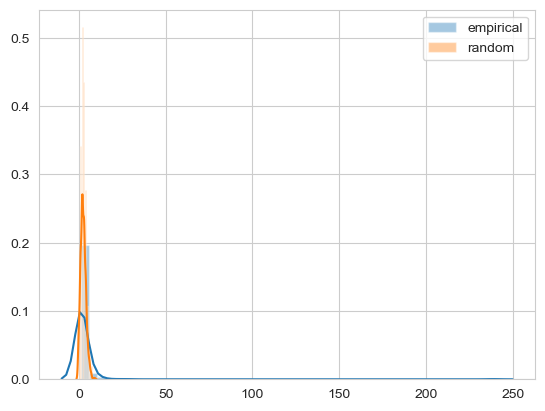

In [11]:
sns.distplot(n_gentoo.degree_sequence(), label="empirical");
sns.distplot(er_gentoo.degree_sequence(), label = "random");
plt.legend()

Again, we find that the degree distribution of the random network is much more narrow than that of the empirical network. In other words: Compared to a simple random graph model this broad degree distribution actually constitutes an interesting pattern that we seek to model and explain. We repeat the same experiment with the highschool contact network:

**highschool**

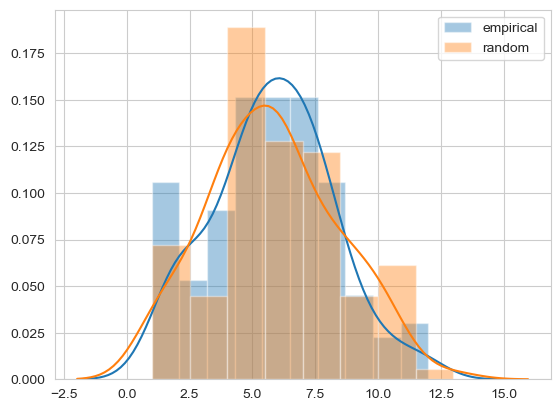

In [12]:
sns.distplot(n_highschool.degree_sequence(), label="empirical");
sns.distplot(er_highschool.degree_sequence(), label = "random");
plt.legend()

**lotr**

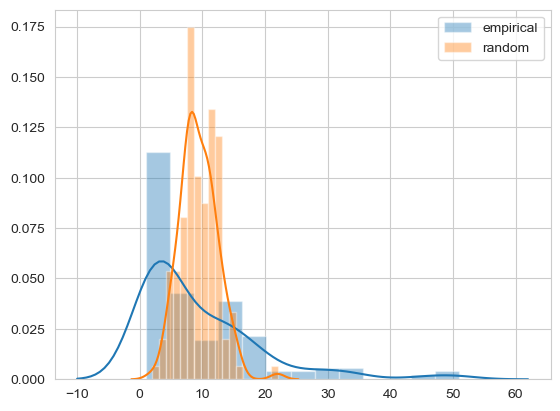

In [13]:
sns.distplot(n_lotr.degree_sequence(), label="empirical");
sns.distplot(er_lotr.degree_sequence(), label = "random");
plt.legend()

Here the empirical degree distribution resembles the degree distribution of a random graph more closely. What about the physicians network?

## Configuration Model

Above we investigated ensamble, properties that can be expected from (fixing) properties such as the number of edges or the average degree (~prob connection)

Another property important to consider is degree distribution. As we saw above the degree distributions of random networks grossly differ from that of the real networks (especially consider the right skewed degree distribution from gentoo). 
Random graphs (even if we fix degree or average degree) , due to generation process

We may want to generalize random graph model (the random graph concept) so that it can produce networks where the fixed-expected property is the degree distribution (expected degree distribution)

Configuration models -or Molloy Reed model,as it was invented by them in 1995-  provides a solution to that, providing a way to generate random graphs with **any** degree sequence (distribution). 

Any degree sequence... that creates a graph! There are a series of rule that tell if the a degree sequence can generate a graph (i.e. is graphic) ref Erdos Gallai.

In pathpy we can test whether a sequence is graphic (i.e. whether a graph exists that has the sequence as degree sequence) with the `is_graphic_Erdos_Gallai` function in the `generators`module:

In [14]:
graphic_sequence = [1,2,2,3]
pp.generators.is_graphic_Erdos_Gallai(graphic_sequence)

True

In [15]:
non_graphic_sequence = [2,2,2,3]
pp.generators.is_graphic_Erdos_Gallai(non_graphic_sequence)

False

Graphic sequences are relevant since with them we can implement the Molloy-Reed/Configuration model, which generates random networks with an arbitrary degree distribution. This model is implemented by the following function:

In [16]:
pp.generators.Molloy_Reed(graphic_sequence)

if we try to pass sequence that is not graphic (do we get an error message?):

In [17]:
pp.generators.Molloy_Reed(non_graphic_sequence)

Now we have random networks that exactly reproduce degree distributions of empirical ones

In [18]:
mr_gentoo = pp.generators.random_graphs.Molloy_Reed_randomize(n_gentoo)
mr_highschool = pp.generators.random_graphs.Molloy_Reed_randomize(n_highschool)
mr_lotr =  pp.generators.random_graphs.Molloy_Reed_randomize(n_lotr) # could be disconnected

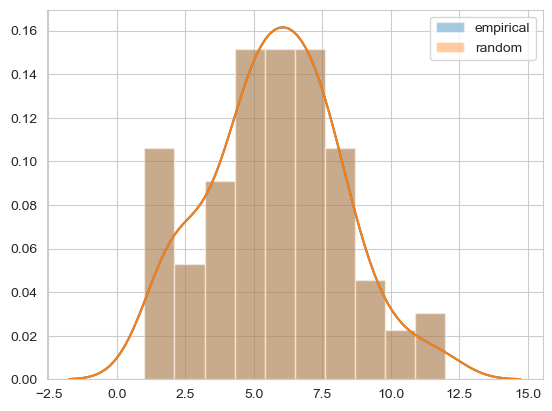

In [19]:
sns.distplot(n_highschool.degree_sequence(), label="empirical");
sns.distplot(mr_highschool.degree_sequence(), label = "random");
plt.legend()

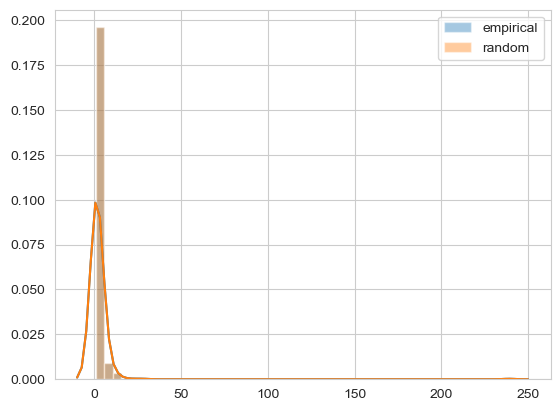

In [20]:
sns.distplot(n_gentoo.degree_sequence(), label="empirical");
sns.distplot(mr_gentoo.degree_sequence(), label = "random");
plt.legend()

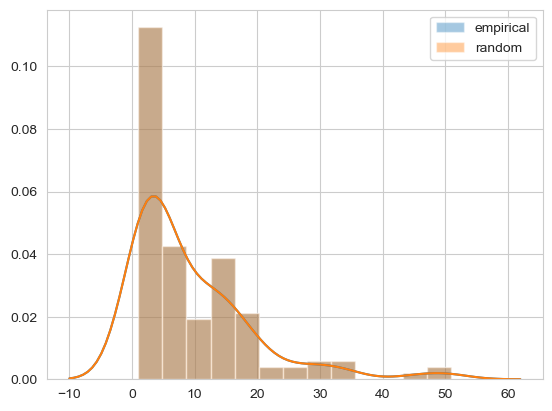

In [21]:
sns.distplot(n_lotr.degree_sequence(), label="empirical");
sns.distplot(mr_lotr.degree_sequence(), label = "random");
plt.legend()

we can also generate networks with a fixed degree distribution rather than a fixed degree sequence. For this we first draw degree sequences from a given distribution, check whether the sequence is graphic and then apply the model above. Below, we apply this to a sequence of 300 degrees drawn from a *Zipf* distribution with parameter $\gamma=2.7$, and a *Poisson* distribution with $\lambda=3$. We then generate two random networks with the drawn degree sequences, plot the networks as well as their degree distributions. To draw the degree sequences we can use the implementations of distributions in `np.random.zipf` and `np.random.poisson`.

In [22]:
degrees_zipf = [1]
while not pp.generators.is_graphic_Erdos_Gallai(degrees_zipf):
    degrees_zipf = [int(x) for x in np.random.zipf(2.5, 300)]

g_zipf = pp.generators.Molloy_Reed(degrees_zipf)
# g_zipf.plot()

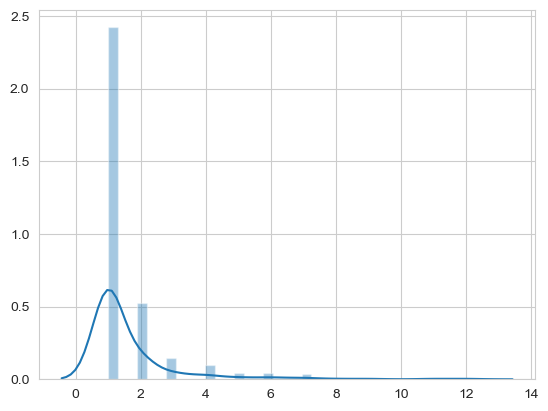

In [23]:
sns.distplot(pp.statistics.degree_sequence(g_zipf));

# Diameter and clustering coefficient of random networks vs. empirical networks

(small word properties)

In [24]:
print("\nemp")
print(n_gentoo.is_connected)
print(n_highschool.is_connected)
print(n_lotr.is_connected)

print("\nG(n,m)")
print(er_gentoo.is_connected)
print(er_highschool.is_connected)
print(er_lotr.is_connected)

print("\nmolloy reed")
print(mr_gentoo.is_connected)
print(mr_highschool.is_connected)
print(mr_lotr.is_connected)


emp
True
True
True

G(n,m)
False
True
True

molloy reed
False
True
False


In [25]:
er_gentoo = pp.generators.random_graphs.ER_np_randomize(er_gentoo).largest_connected_component()
mr_gentoo = pp.generators.random_graphs.ER_np_randomize(n_gentoo).largest_connected_component()
print("Empirical network has", n_gentoo.number_of_nodes(), "nodes and", n_gentoo.number_of_edges(), "edges")
print("G(n,p) microstate has", er_gentoo.number_of_nodes(), "nodes and", er_gentoo.number_of_edges(), "edges")
print("Molloy-Reed microstate has", mr_gentoo.number_of_nodes(), "nodes and", mr_gentoo.number_of_edges(), "edges")

Empirical network has 403 nodes and 513 edges
G(n,p) microstate has 360 nodes and 517 edges
Molloy-Reed microstate has 359 nodes and 483 edges


For gentoo the random realization is not connected, which would lead to an infinite diameter and average shortest path length. To still allow for an approximate comparison, we can compute the calculations on the largest connected component.

In [29]:
#GENTOO
# Empirical 
diameter_n_gentoo = n_gentoo.largest_connected_component().diameter()
avg_pl_n_gentoo = pp.algorithms.avg_path_length(n_gentoo)
avg_clst_n_gentoo = n_gentoo.avg_clustering_coefficient()
# G(n,p)
diameter_er_gentoo = er_gentoo.diameter()
avg_pl_er_gentoo = pp.algorithms.avg_path_length(er_gentoo)
avg_clst_er_gentoo = er_gentoo.avg_clustering_coefficient()
# Molloy-Reed
diameter_mr_gentoo = mr_gentoo.diameter()
avg_pl_gentoo = pp.algorithms.avg_path_length(mr_gentoo)
avg_clst_gentoo = mr_gentoo.avg_clustering_coefficient()
print("\ngentoo")
print("empirical")
print('Diameter = ', diameter_n_gentoo)
print('Avg path length = ', avg_pl_n_gentoo)
print('Clustering coefficient = ', avg_clst_n_gentoo)
print("$G(n,m)")
print('Diameter = ', diameter_er_gentoo)
print('Avg path length = ', avg_pl_er_gentoo)
print('Clustering coefficient = ', avg_clst_er_gentoo)
print("Molloy-Reed")
print('Diameter = ', diameter_mr_gentoo)
print('Avg path length = ', avg_pl_mr_gentoo)
print('Clustering coefficient = ', avg_clst_mr_gentoo)


gentoo
empirical
Diameter =  8.0
Avg path length =  3.1096379146451367
Clustering coefficient =  0.017357355654577637
$G(n,m)
Diameter =  13.0
Avg path length =  5.883163107397091
Clustering coefficient =  0.004391534391534392
Molloy-Reed
Diameter =  14.0


NameError: name 'avg_pl_mr_gentoo' is not defined

In [27]:
# HIGHSCHOOL
# Empirical 
diameter_n_highschool = n_highschool.diameter()
avg_pl_n_highschool = pp.algorithms.avg_path_length(n_highschool)
avg_clst_n_highschool = n_highschool.avg_clustering_coefficient()
# G(n,p)
diameter_er_highschool = er_highschool.diameter()
avg_pl_er_highschool = pp.algorithms.avg_path_length(er_highschool)
avg_clst_er_highschool = er_highschool.avg_clustering_coefficient()
# Molloy-Reed
diameter_mr_highschool = mr_highschool.diameter()
avg_pl_mr_highschool = pp.algorithms.avg_path_length(mr_highschool)
avg_clst_mr_highschool = mr_highschool.avg_clustering_coefficient()
print("\nhighschool")
print("empirical")
print('Diameter = ', diameter_n_highschool)
print('Avg path length = ', avg_pl_n_highschool)
print('Clustering coefficient = ', avg_clst_n_highschool)
print("$G(n,m)")
print('Diameter = ', diameter_er_highschool)
print('Avg path length = ', avg_pl_er_highschool)
print('Clustering coefficient = ', avg_clst_er_highschool)
print("Molloy-Reed")
print('Diameter = ', diameter_mr_highschool)
print('Avg path length = ', avg_pl_mr_highschool)
print('Clustering coefficient = ', avg_clst_mr_highschool)


highschool
empirical
Diameter =  12.0
Avg path length =  5.362745098039215
Clustering coefficient =  0.446799543049543
$G(n,m)
Diameter =  6.0
Avg path length =  2.9448179271708685
Clustering coefficient =  0.052298303548303546
Molloy-Reed
Diameter =  5.0
Avg path length =  2.8932773109243697
Clustering coefficient =  0.041785113035113036


In [28]:
# LOTR
# Empirical 
diameter_n_lotr = n_lotr.diameter()
avg_pl_n_lotr = pp.algorithms.avg_path_length(n_lotr)
avg_clst_n_lotr = n_lotr.avg_clustering_coefficient()
# G(n,p)
diameter_er_lotr = er_lotr.diameter()
avg_pl_er_lotr = pp.algorithms.avg_path_length(er_lotr)
avg_clst_er_lotr = er_lotr.avg_clustering_coefficient()
# Molloy-Reed
diameter_mr_lotr = mr_lotr.diameter()
avg_pl_mr_lotr = pp.algorithms.avg_path_length(mr_lotr)
avg_clst_mr_lotr = mr_lotr.avg_clustering_coefficient()
print("\nlotr")
print("empirical")
print('Diameter = ', diameter_n_lotr)
print('Avg path length = ', avg_pl_n_lotr)
print('Clustering coefficient = ', avg_clst_n_lotr)
print("$G(n,m)")
print('Diameter = ', diameter_er_lotr)
print('Avg path length = ', avg_pl_er_lotr)
print('Clustering coefficient = ', avg_clst_er_lotr)
print("Molloy-Reed")
print('Diameter = ', diameter_mr_lotr)
print('Avg path length = ', avg_pl_mr_lotr)
print('Clustering coefficient = ', avg_clst_mr_lotr)


lotr
empirical
Diameter =  6.0
Avg path length =  2.6724273369992146
Clustering coefficient =  0.5848854454659763
$G(n,m)
Diameter =  4.0
Avg path length =  2.4127482886320277
Clustering coefficient =  0.0733946608946609
Molloy-Reed
Diameter =  inf
Avg path length =  inf
Clustering coefficient =  0.24753377725159126


We find that for **gentoo** both the diameter and the average shortest path length of the largest connected component of the random realization is much larger than that of the random realization. 

Interestingly for **highschool** the diameter and average path lengths of the random realization are smaller than that of the empirical network, i.e. we find the opposite case compared to the gentoo network.


and comment on clustering

[Text(0, 0, 'Empirical'), Text(0, 0, '$G(n,m)$')]

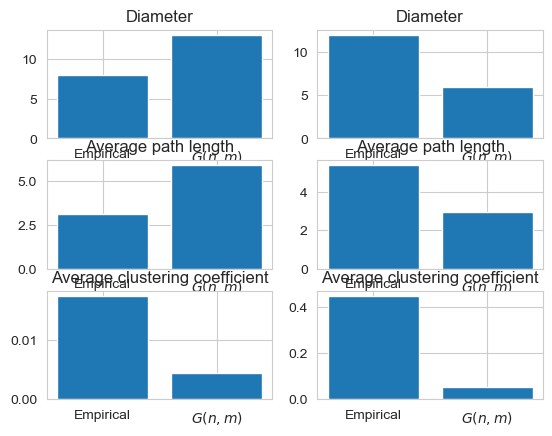

In [30]:
import numpy as np
import scipy

labels = ["Empirical","$G(n,m)$"]
xs = list(range(len(labels)))

fig, ((ax1, ax2),(ax3,ax4),(ax5, ax6)) = plt.subplots(nrows=3, ncols=2)
ax1.set_title("Diameter")
ax1.bar(xs, [diameter_n_gentoo, diameter_er_gentoo] )
ax1.set_xticks(xs)
ax1.set_xticklabels(labels)

ax2.set_title("Diameter")
ax2.bar(xs, [diameter_n_highschool, diameter_er_highschool] )
ax2.set_xticks(xs)
ax2.set_xticklabels(labels)

ax3.set_title("Average path length")
ax3.bar(xs, [avg_pl_n_gentoo, avg_pl_er_gentoo])
ax3.set_xticks(xs)
ax3.set_xticklabels(labels)

ax4.set_title("Average path length")
ax4.bar(xs, [avg_pl_n_highschool, avg_pl_er_highschool])
ax4.set_xticks(xs)
ax4.set_xticklabels(labels)

ax5.set_title("Average clustering coefficient")
ax5.bar(xs, [avg_clst_n_gentoo, avg_clst_er_gentoo])
ax5.set_xticks(xs)
ax5.set_xticklabels(labels)

ax6.set_title("Average clustering coefficient")
ax6.bar(xs, [avg_clst_n_highschool, avg_clst_er_highschool])
ax6.set_xticks(xs)
ax6.set_xticklabels(labels)





# fig.legend()


# The Watts-Strogatz model



We saw that many networks are characterized by having short diameter and large clustering coefficient. 

We just saw that even Molloy Reed models lack.. etc.. etc...degree correlation, assortativity, clustering and transitivity

In the second unit we implement the Watts-Strogatz model and explore how its parameters influence those characteristics that are associated with the small-world property of (social) networks.

In `pathpy` the Watts-Strogatz model is implemented in the function `pp.generators.Watts_Strogatz`:

With this, we can generate and plot random realisations with $n=100$ nodes and different rewiring probabilities of $p=0$, $p=0.04$ and $p=1$. We use the implementation of a lattice layout in `pathpy`, which allows us to arrange nodes in a ring topology.

In [31]:
n_ws = pp.generators.Watts_Strogatz(100, 3, 0.5)

In [32]:
er_ws = pp.generators.ER_nm_randomize(n_ws)
mr_ws = pp.generators.Molloy_Reed_randomize(n_ws)

In [33]:
print(n_ws.avg_path_length())
print(n_ws.avg_clustering_coefficient())
print()
print(er_ws.avg_path_length())
print(er_ws.avg_clustering_coefficient())
print()
print(mr_ws.avg_path_length())
print(mr_ws.avg_clustering_coefficient())

2.8115151515151515
0.11841269841269839

inf
0.0583080808080808

2.7488888888888887
0.04967460317460317


# P02-03: Modularity Optimisation



In the third and last unit of this week's practice lecture, we explore the partition quality function $Q(n, C)$ that captures how well a given mapping of nodes to communities is aligned with the topology of a network. We use this function to develop a simple community detection algorithm that is based on the heuristic optimisation of partition quality. We also implement the community assortativity coefficient, which allows us to compare the optimal partition quality (i.e. modularity) to the maximally possible modularity in a given network.

Modularity also compares network with what was expected at random, does so (uses that) to detect communities. 

In [ ]:
import pathpy as pp
import numpy as np

import sqlite3
from tqdm import tqdm

import random
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('default')
sns.set_style("whitegrid")

We can now test our function in the example network from the lecture.

In [ ]:
n = pp.Network(directed=False)
n.add_edge('a', 'b')
n.add_edge('b', 'c')
n.add_edge('a', 'c')
n.add_edge('b', 'd')
n.add_edge('d', 'f')
n.add_edge('d', 'g')
n.add_edge('d', 'e')
n.add_edge('e', 'f')
n.add_edge('f', 'g')
n.plot()

In [ ]:
C, q = pp.algorithms.community_detection.modularity_maximisation(n, iterations=100)
print('Community partition =', C)
print('Modularity =', q)

We can also use the function `color_map` to generate a color mapping that can be directly passed to the `plot` function:

In [ ]:
n.plot(node_color=pp.algorithms.community_detection.color_map(n, C))

**Maybe create example where you detect from connected fully connected graphs**

This also allows to show the summing of networks function. 

In [ ]:
regular_1 = pp.generators.random_graphs.Molloy_Reed([5]*100, node_uids=[str(i) for i in range(100)])
regular_2 = pp.generators.random_graphs.Molloy_Reed([5]*100, node_uids=[str(i) for i in range(100,200)])
modular = regular_1 + regular_2

## Modularity-based Community Detection in Empirical networks

We conclude this weeks practice lecture by an application of modularity-based community detection to empirical networks. We limit ourselves to the undirected networks `highschool`, `physician`, and `lotr` in our database:

$C$ the partition quality $Q(G, C)$ is defined as
$$ Q(G,C) = \frac{1}{2m} \sum_{i,j \in V}\left(A_{ij} - \frac{d_id_j}{2m}\right) \delta(c_i,c_j) $$ where $d_i$ denotes the degree of node $i$ 


Modularity compares connections between two nodes with expected number of connections between those nodes. 

These expectation is based on the configuration model!

extract from wiki:

Modularity Q is then defined as the fraction of edges that fall within group 1 or 2, minus the expected number of edges within groups 1 and 2 for a random graph with the same node degree distribution as the given network.

The expected number of edges shall be computed using the concept of a configuration model.[4] The configuration model is a randomized realization of a particular network. Given a network with {\displaystyle n}n nodes, where each node {\displaystyle v}v has a node degree {\displaystyle k_{v}}{\displaystyle k_{v}}, the configuration model cuts each edge into two halves, and then each half edge, called a stub, is rewired randomly with any other stub in the network (except itself), even allowing self-loops (which occur when a stub is rewired to another stub from the same node) and multiple-edges between the same two nodes. Thus, even though the node degree distribution of the graph remains intact, the configuration model results in a completely random network.

In [40]:
C, q = pp.algorithms.community_detection.modularity_maximisation(n_highschool, iterations=1500)


maximising modularity: 100%|███████████████████████████████████████████████████████| 1500/1500 [00:49<00:00, 30.33it/s]


In [41]:
n_highschool.plot(node_color=pp.algorithms.community_detection.color_map(n_highschool, C))

# Molloy-Reed model as null model for empirical networks

An important application of the Molloy-Reed model in statistical network analysis is as a null model that helps us to establish a baseline for what we can expect at random, if we account for the heterogeneous degrees in a real network. To show the advantage over simple rrandom graph models that only preserve the size of the network, we make an experiment with real data. We compare the diameter and average shortest path length of the largest connected component in empirical networks with those of random microstates generated using the $G(n,p)$ and the Molloy-Reed model. 

To simplify the generation of random microstates that preserve the macrostate of an empirical network, the functions in the module `pathpy.generators` come in a `randomize` version, which automatically preserve the corresponding macrostate of a given network. In the case of the $G(n,p)$ model this automatically adjust the parameters $n$ and $p$ such that the expected number of links matches the observed number of links in the given network. For the molloy-Reed model, the degree sequence of the empirical network is used in the generation of a random microstate. All other network properties like, e.g. node uids are preserved. We demonstrate this in the following example: